### Introduction

In [1]:
!pip install forex-python

In [5]:
#import the forex-python just

#import forex_python

In [41]:
#Import all the necessary libraries required to carry out this BTC forecast
import pandas as pd
from forex_python.bitcoin import BtcConverter
b = BtcConverter()
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.dates as dates

In [6]:
dir(forex_python)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [10]:
#from forex_python.ethereum import BtcConverter

#b = BtcConverter()
#ethereum.

In [11]:
from datetime import datetime, timedelta

start = datetime(2014,1,1)
end = datetime(2022,9,30)

In [12]:
price = b.get_previous_price_list('USD', start, end)

In [13]:
len(price)

3084

In [14]:
list(price.keys())[:10]

['2014-01-01',
 '2014-01-02',
 '2014-01-03',
 '2014-01-04',
 '2014-01-05',
 '2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10']

In [19]:
#Create a dataframe and put it inside a dataframe

price_df = pd.DataFrame(price.items(), columns=["date", "price"])

In [21]:
#Show the top 10 number
price_df.head(10)

,date,price
0,2014-01-01,770.4357
1,2014-01-02,808.0485
2,2014-01-03,830.0240
3,2014-01-04,858.9833
4,2014-01-05,940.0972
5,2014-01-06,951.3865
6,2014-01-07,810.5833
7,2014-01-08,859.9485
8,2014-01-09,860.8950
9,2014-01-10,884.6667


In [23]:
price_df = price_df.set_index('date')

In [24]:
price_df.head()

,price
date,
2014-01-01,770.4357
2014-01-02,808.0485
2014-01-03,830.0240
2014-01-04,858.9833
2014-01-05,940.0972


In [25]:
price_df.loc["2017-01-01":"2018-01-01"]

,price
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2017-12-28,14428.7600
2017-12-29,14427.8700
2017-12-30,12629.8138


<AxesSubplot:xlabel='date'>

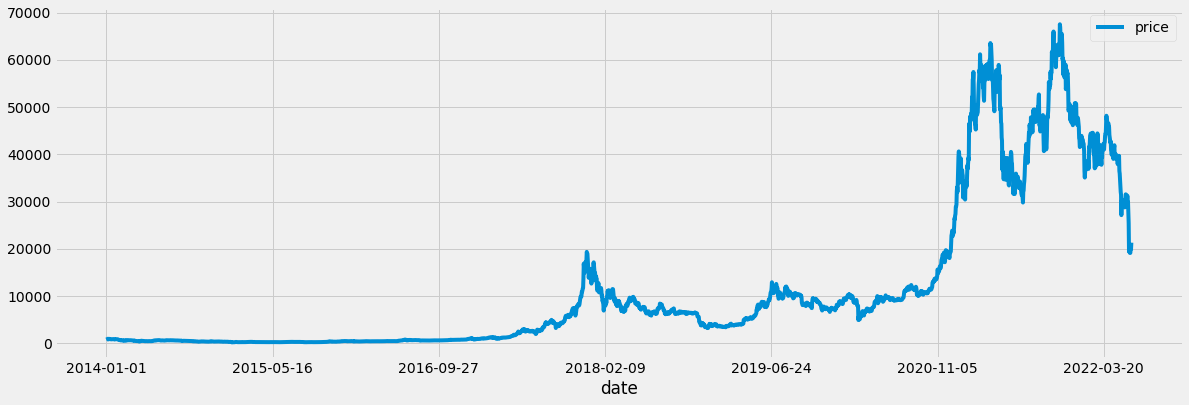

In [37]:
#Show the price movement in BTC Between 2014 and 2022 
price_df.plot(figsize=(18,6))

<AxesSubplot:xlabel='date'>

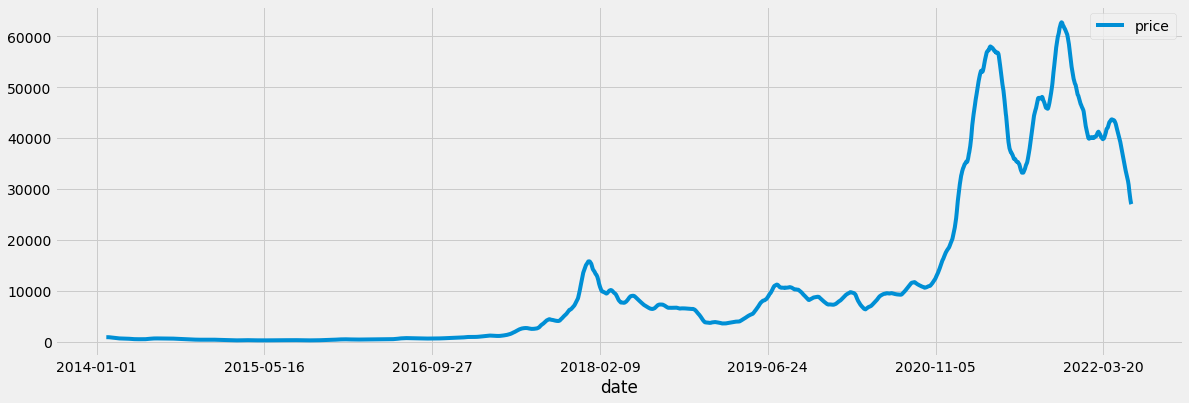

In [36]:
#Shpw the 30 day rolling average
price_df.rolling(30).mean().plot(figsize=(18,6))

In [33]:
rolling = price_df.rolling(30).mean()

In [16]:
# January 31st, 2020 as start of pandemic

<AxesSubplot:xlabel='date'>

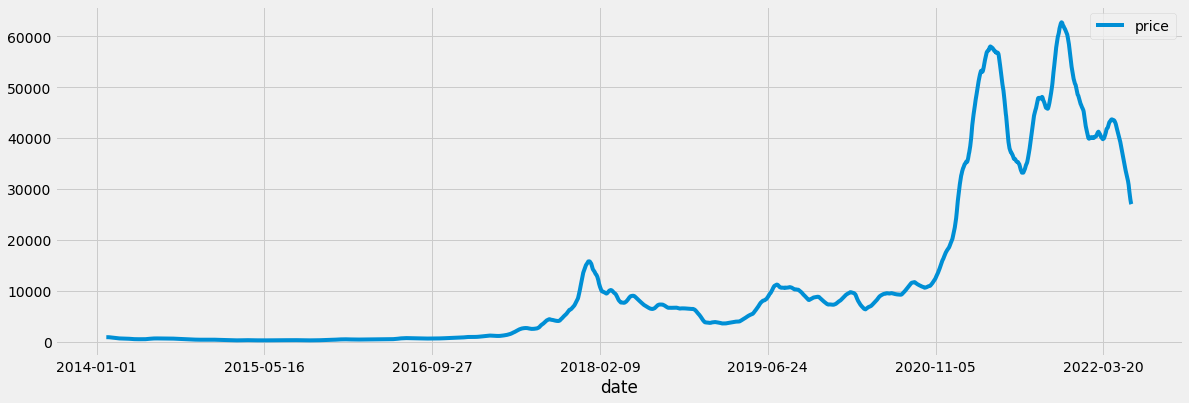

In [38]:
#Show the rolling price of BTC

rolling.plot(figsize=(18,6))

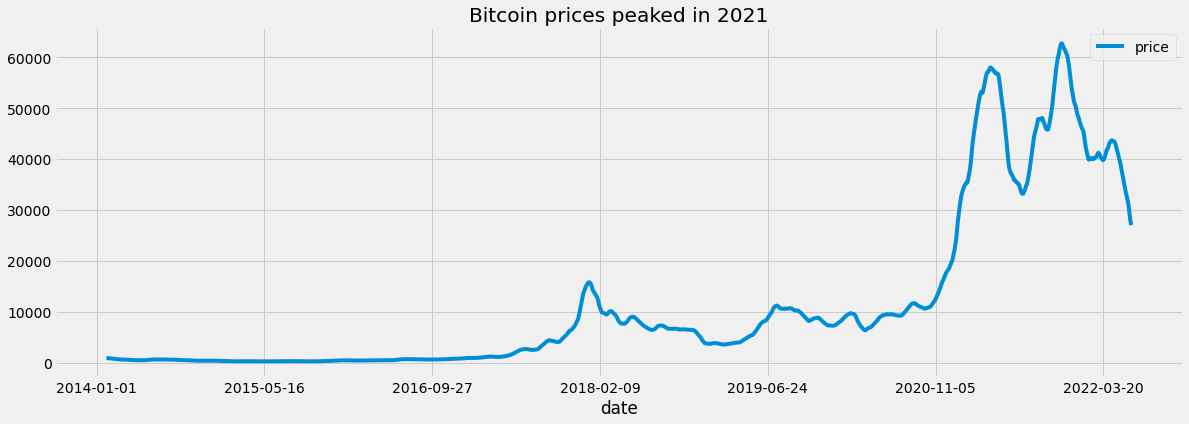

In [40]:
#Show the price of the bitcoins
ax = rolling.plot(figsize=(18,6))

plt.title("Bitcoin prices peaked in 2021")
plt.show()

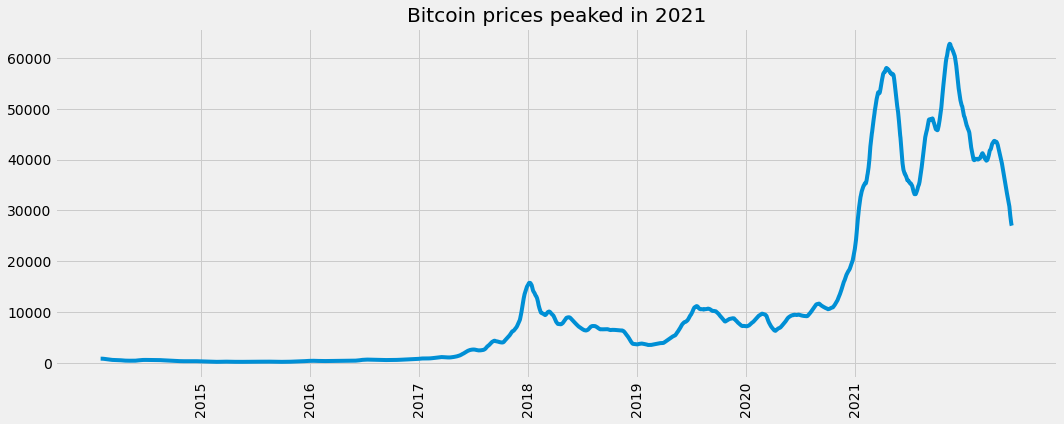

In [45]:
#Show matplotlib dates to import 
#plt.figure(figsize= (16,7))  -- Won't run

fig,ax = plt.subplots(figsize=(16,6))
ax.plot(rolling.index.values,
        rolling["price"],
        linewidth=4)

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]

plt.title("Bitcoin prices peaked in 2021")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)
plt.show()

In [53]:
price_df.loc["2021-12-31"]

price    46206.1767
Name: 2021-12-31, dtype: float64

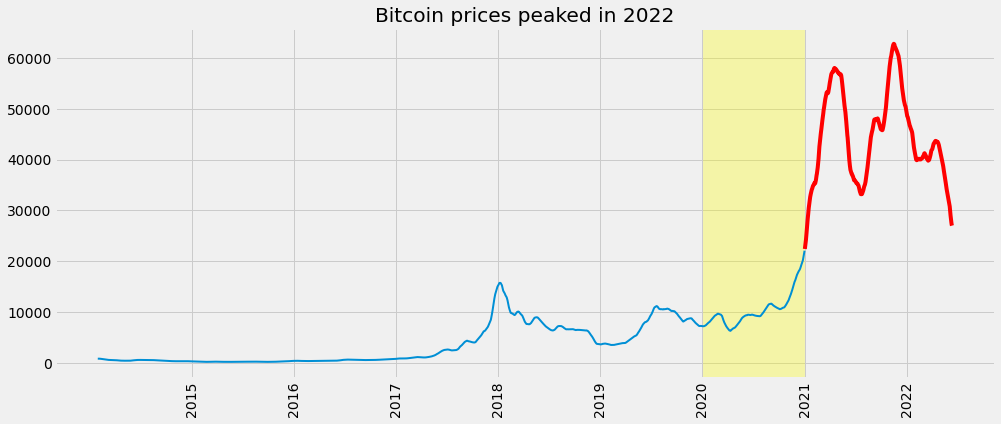

In [59]:
pre_2021 = rolling.loc[:"2020-12-31"]
post_2021 = rolling.loc["2021-01-01":]


fig,ax = plt.subplots(figsize=(15,6))
ax.plot(pre_2021.index.values,
        pre_2021["price"],
        linewidth=2)

ax.plot(post_2021.index.values,
        post_2021["price"],
        linewidth=4, color="red")

ax.axvspan(xmin=2192, xmax=361 + 2192, ymin=0,
           alpha=0.3, color='yellow')

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

plt.title("Bitcoin prices peaked in 2022")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)
plt.show()

In [60]:
post_2021.shape

(527, 1)